In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

In [3]:
#Import CSV file and convert to dataframe
filename = "citiesfinal.csv"
path = os.path.join("Resources", filename)
df = pd.read_csv(path)

In [4]:
#Create directory to store results
script_dir = os.path.dirname("")
results_dir = os.path.join(script_dir, 'Results/')
if not os.path.isdir(results_dir):
    os.makedirs(results_dir)

In [5]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [40]:
weather_df = df

In [41]:
#Convert temperature data to Fahrenheit 

weather_df["Temp_F"] = weather_df["temp"].apply(lambda x: x*9/5-459.67)
weather_df["Temp_Min_F"] = weather_df["temp_min"].apply(lambda x: x*9/5-459.67)
weather_df["Temp_Max_F"] = weather_df["temp_max"].apply(lambda x: x*9/5-459.67)

#Convert Wind Speed from m/sec to MPH

weather_df["wind_speed_mph"] = weather_df["wind_speed"].apply(lambda x: x*2.237)

#Create dummy latitude colume to use as index for plot trendlines

weather_df["lat_dummy"] = weather_df["lat"]

In [48]:
#Determine Date of run
date  = time.strftime("%b/%d/%Y")

In [49]:
#Fit line with polynomial of degree = 3
z = np.polyfit(x = weather_df.loc[:, "lat"], y = weather_df.loc[:,"Temp_F"], deg =3)
p = np.poly1d(z)
weather_df["trendline"] = p(weather_df.loc[:, "lat"])

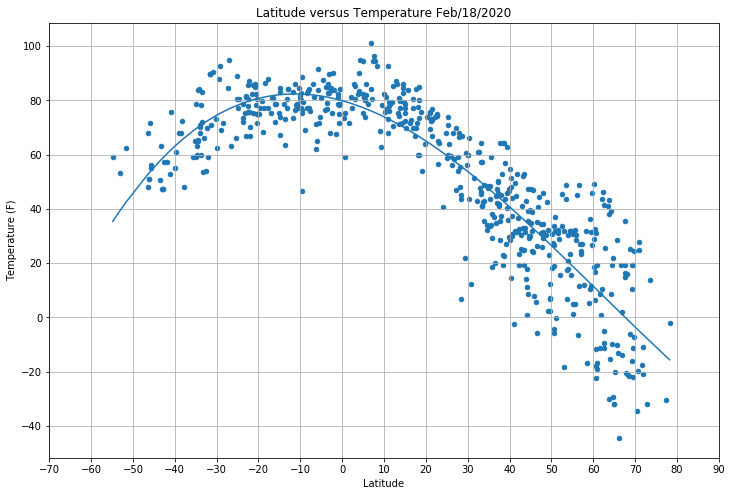

In [50]:
#Create scatterplot of Latitude vs Temperature
ax = weather_df.plot.scatter(figsize=(12,8), x="lat", y="Temp_F")
weather_df.set_index("lat_dummy", inplace = True)
weather_df.trendline.sort_index(ascending = False).plot(ax=ax)
ax.set_xlabel("Latitude", fontsize=10)
ax.set_ylabel("Temperature (F)", fontsize=10 )
ax.set_title(f"Latitude versus Temperature {date}", fontsize = 12)
ax.set_xlim([-70, 70])
plt.xticks([-70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.savefig(results_dir + "Lat_versus_Temp.png")
plt.show()

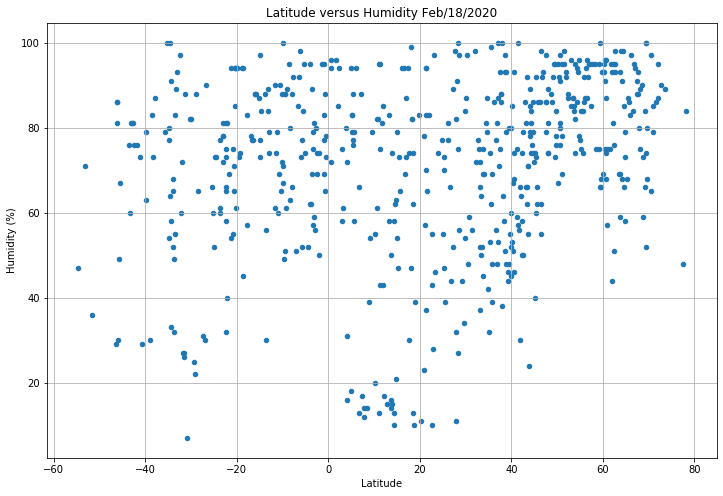

In [51]:
ax = weather_df.plot.scatter(figsize=(12,8), x="lat", y="humidity")
ax.set_xlabel("Latitude", fontsize=10)
ax.set_ylabel("Humidity (%)", fontsize=10 )
ax.set_title(f"Latitude versus Humidity {date}", fontsize = 12)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.savefig(results_dir + "Lat_versus_Humidity.png")
plt.show()

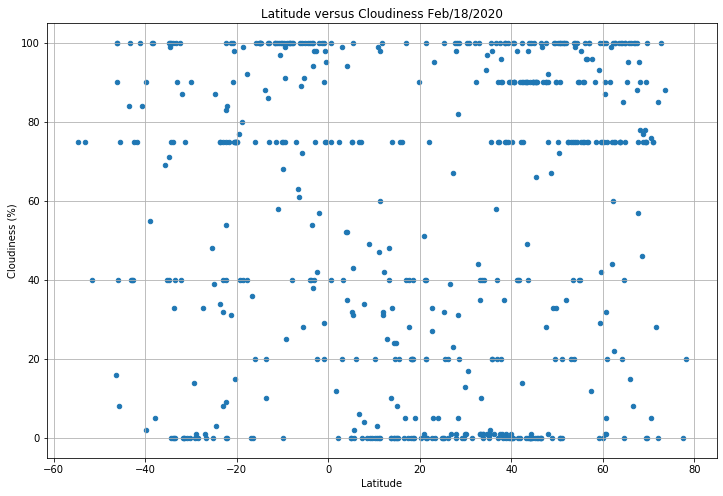

In [52]:
ax = weather_df.plot.scatter(figsize=(12,8), x="lat", y="clouds_percent")
ax.set_xlabel("Latitude", fontsize=10)
ax.set_ylabel("Cloudiness (%)", fontsize=10 )
ax.set_title(f"Latitude versus Cloudiness {date}", fontsize = 12)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.savefig(results_dir + "Lat_versus_Cloudiness.png")
plt.show()

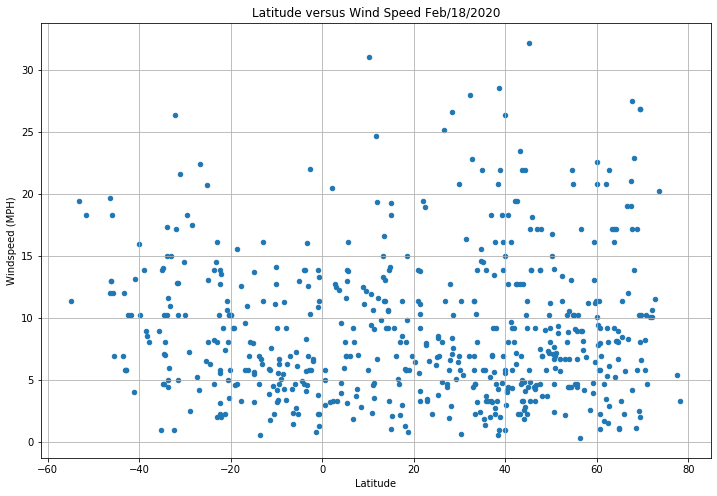

In [53]:
ax = weather_df.plot.scatter(figsize=(12,8), x="lat", y="wind_speed_mph")
ax.set_xlabel("Latitude", fontsize=10)
ax.set_ylabel("Windspeed (MPH)", fontsize=10 )
ax.set_title(f"Latitude versus Wind Speed {date}", fontsize = 12)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.savefig(results_dir + "Lat_versus_Windspeed.png")
plt.show()